# 연습문제 3-2

## 다음은 부산광역시 어린이집 현황의 일부이다. 어린이집유형 속성과 어린이집특성 속성 간의 연관성 여부를 유의수준 0.05 수준에서 카이제곱 검정 방법에 의해 판단해 보시오.

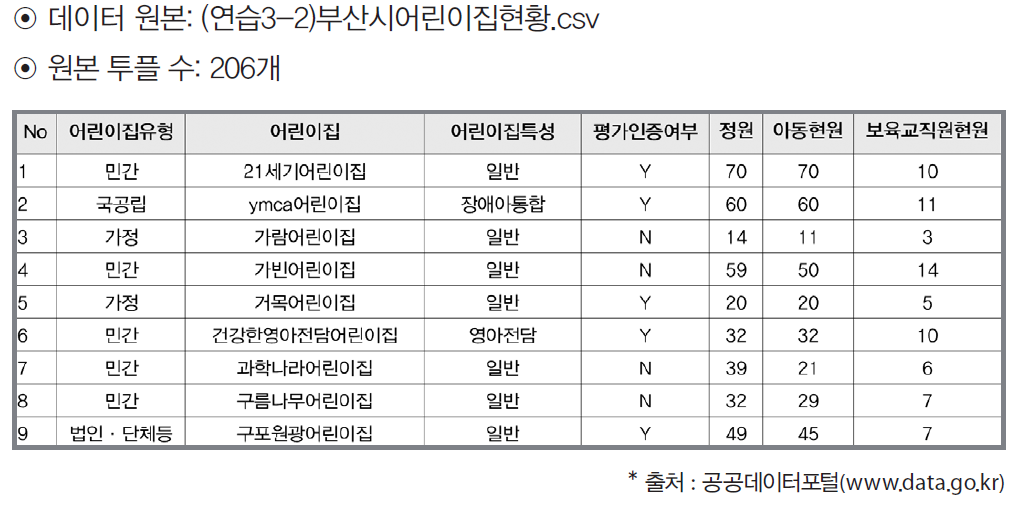

In [3]:
# ex3-2(연습).ipynb
import pandas as pd
import numpy as np
import cx_Oracle      # Oracle DB 연동을 위한 cx_Oracle 패키지 임포트

# 데이터로드 ((연습3-2)부산시어린이집현황.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용


In [4]:
rawData_org

No  어린이집유형         어린이집 어린이집특성 평가인증여부   정원  아동현원  보육교직원현원
0      1      민간     21세기어린이집     일반      Y   70    70       10
1      2     국공립     ymca어린이집  장애아통합      Y   60    60       11
2      3      가정       가람어린이집     일반      N   14    11        3
3      4      민간       가빈어린이집     일반      N   59    50       14
4      5      가정       거목어린이집     일반      Y   20    20        5
5      6      민간  건강한영아전담어린이집   영아전담      Y   32    32       10
6      7      민간     과학나라어린이집     일반      N   39    21        6
7      8      민간     구름나무어린이집     일반      N   32    29        7
8      9  법인·단체등     구포원광어린이집     일반      Y   49    45        7
9     10      민간       국제어린이집     일반      Y   88    80       13
10    11      민간     그루터기어린이집     일반      N   25    21        6
11    12      가정    그린베이비어린이집     일반      Y   20    20        6
12    13      가정       그린어린이집     일반      N   14    12        4
13    14      가정     그린코아어린이집     일반      N   19    19        5
14    15      가정     그림나라어린이집     일반      Y   20    20        4
15    16      민간    금곡건강한어린이집     일반      N   93    47        9
16    17      가정     금곡이안어린이집     일반      Y   19    19        5
17    18      가정      꼬꼬마어린이집     일반      Y   11     8        4
18    19      가정      꼬꼬망어린이집     일반      Y   20    20        5
19    20      민간    꼬마대통령어린이집     일반      Y  113   113       20
20    21      가정     꼬마세상어린이집     일반      N   13    13        3
21    22      민간      꼬마숲어린이집     일반      N   67    29        7
22    23      가정    꼬마자람터어린이집     일반      N   13    11        3
23    24      민간      꽃사슴어린이집     일반      N   43    37        8
24    25      가정      꾸러기어린이집     일반      Y   20    17        5
25    26      가정      꿈나무어린이집     일반      N   18    13        4
26    27      민간     꿈동산 어린이집     일반      N  127   126       19
27    28      민간      꿈마루어린이집     일반      N   38    32       10
28    29      민간      꿈사랑어린이집     일반      Y   26    21        6
29    30      민간       나라어린이집     일반      Y   29    25        7
..   ...     ...          ...    ...    ...  ...   ...      ...
176  177      민간      하늘숲어린이집     일반      N   39    29        8
177  178      민간     하늘연못어린이집     일반      N   36    27        6
178  179      가정     하늘영재어린이집     일반      N   19    11        4
179  180      가정      하늘채어린이집     일반      Y   20    20        4
180  181      민간       한별어린이집     일반      Y   82    51       10
181  182      가정      한사랑어린이집     일반      Y    9     9        3
182  183  사회복지법인       한솔어린이집  장애아전문      Y   39    39       18
183  184      민간       함박어린이집     일반      Y   30    14        5
184  185      가정      해누리어린이집     일반      Y   20    20        4
185  186      가정     해맑은 어린이집     일반      Y   20    11        3
186  187      가정    해바라기숲어린이집     일반      Y   15    13        4
187  188      민간      해오름어린이집     일반      N   39    25        7
188  189      가정      해와달어린이집     일반      Y   20    19        4
189  190      민간       해인어린이집     일반      Y   93    91       12
190  191      가정     해피아이어린이집     일반      N   20     8        2
191  192      가정     햇님동화어린이집     일반      N   20    20        5
192  193      민간   햇님몬테소리어린이집     일반      N   23     6        3
193  194      가정     햇살가득어린이집     일반      N   20    20        5
194  195      민간    햇살가득한어린이집     일반      Y  111   111       16
195  196      가정     햇살마루어린이집     일반      N   20    20        5
196  197      가정       햇살어린이집     일반      Y   20    20        5
197  198      민간       행복어린이집  장애아전문      Y   26    25       13
198  199      가정      행복한어린이집     일반      N   20    20        7
199  200      민간     현대라임어린이집     일반      Y   26    26        7
200  201      가정     현대조은어린이집     일반      Y   20    20        5
201  202      민간      화명숲어린이집     일반      N   64    64       12
202  203     국공립       화명어린이집     일반      Y   83    79       10
203  204     국공립     화명초등어린이집     일반      Y   49    46        7
204  205      민간       화영어린이집     일반      Y   95    77       14
205  206      민간       효림어린이집     일반      N  159   143       24

[206 rows x 8 columns]

In [5]:
# 원본 데이터파일에서 '어린이집유형'과 '어린이집특성' 속성만 추출


In [6]:
rawData

어린이집유형 어린이집특성
0        민간     일반
1       국공립  장애아통합
2        가정     일반
3        민간     일반
4        가정     일반
5        민간   영아전담
6        민간     일반
7        민간     일반
8    법인·단체등     일반
9        민간     일반
10       민간     일반
11       가정     일반
12       가정     일반
13       가정     일반
14       가정     일반
15       민간     일반
16       가정     일반
17       가정     일반
18       가정     일반
19       민간     일반
20       가정     일반
21       민간     일반
22       가정     일반
23       민간     일반
24       가정     일반
25       가정     일반
26       민간     일반
27       민간     일반
28       민간     일반
29       민간     일반
..      ...    ...
176      민간     일반
177      민간     일반
178      가정     일반
179      가정     일반
180      민간     일반
181      가정     일반
182  사회복지법인  장애아전문
183      민간     일반
184      가정     일반
185      가정     일반
186      가정     일반
187      민간     일반
188      가정     일반
189      민간     일반
190      가정     일반
191      가정     일반
192      민간     일반
193      가정     일반
194      민간     일반
195      가정     일반
196      가정     일반
197      민간  장애아전문
198      가정     일반
199      민간     일반
200      가정     일반
201      민간     일반
202     국공립     일반
203     국공립     일반
204      민간     일반
205      민간     일반

[206 rows x 2 columns]

In [7]:
# Oracle DB 연결
# 접속정보(connection string) : ID/PASS@CONNECTION_ALIAS
# CONNECTION_ALIAS : Oracle TNSNAMES.ORA 파일에 있는 접속정보 별칭(ALIAS)
conn_ora = cx_Oracle.connect("prep1/prep1@XE")

# DB 커서(Cursor) 선언
cur = conn_ora.cursor()

# 사용할 Oracle 소스 테이블명 지정
src_table = "ex_base3_2"

# 데이터프레임(rawData)에 저장된 데이터를 Oracle 테이블(d_base3_2)에 입력하기 위한 로직
# d_base3_2 테이블 존재하는지 체크하는 함수
def table_exists(name=None, con=None):
    sql = "select table_name from user_tables where table_name='MYTABLE'".replace('MYTABLE', name.upper())
    df = pd.read_sql(sql, con)

    # 테이블이 존재하면 True, 그렇지 않으면 False 반환
    exists = True if len(df) > 0 else False
    return exists

# 테이블(d_base3_2) 생성 (테이블이 이미 존재한다면 TRUNCATE TABLE)
if table_exists(src_table, conn_ora):
    cur.execute("TRUNCATE TABLE " + src_table)
else:
    cur.execute("create table " + src_table + " ( \
               어린이집유형 varchar2(20), \
               어린이집특성 varchar2(30))")

# Sequence 구조를 Dictionary 구조((element, value))로 변환하는 함수
# 예: ("Matt", 1) -> {'1':'Matt', '2':1}
# INSERT INTO ... VALUES (:1, :2, ...) 에서 바인드 변수값을 주기위해 Dictionary item 구조 사용
def convertSequenceToDict(list):
    dict = {}
    argList = range(1, len(list) + 1)
    for k, v in zip(argList, list):
        dict[str(k)] = v
    return dict

# 데이터프레임에 저장된 데이터를 Oracle 테이블로 입력(insert)
cols = [k for k in rawData.dtypes.index]
colnames = ','.join(cols)
colpos = ', '.join([':' + str(i + 1) for i, f in enumerate(cols)])
insert_sql = 'INSERT INTO %s (%s) VALUES (%s)' % (src_table, colnames, colpos)

# INSERT INTO ... VALUES (:1, :2, ...)의 바인드 변수 값을 저장하는 Dictionary 구조 생성
data = [convertSequenceToDict(rec) for rec in rawData.values]

# 바인드 변수와 Dictionary 데이터구조를 활용하여 Bulk Insertion 구현
cur.executemany(insert_sql, data)
conn_ora.commit()

### 실무예제 2-2의 Oracle 연동 설명 참조
### Oracle sqlplus를 통해서 d_base3_2 테이블 생성 확인

In [8]:
# 관측도수/기대도수 분할표 생성 (1차원 배열 형식)


### pandas 데이터프레임에 카이제곱 검정을 위한 관측도수/기대도수 분할표 저장
### ‘시군’ 속성 ‘지정구분’ 속성에 대한 관측도수와 기대도수를 구하기 위해서 Oracle SQL을 활용
#### 관측도수 :  ‘시군’과 ‘지정구분’ 속성값의 조합에 대한 실제 출현횟수
#### 기대도수 : 전체 행의 개수와 각 속성의 카디널러티(cardinality, 서로 다른 속성값의 개수)를 구하여 산출
#### 실제 출현하지 않은 (시군+지정구분) 속성값도 포함시키기 위해서 외부조인(outer join)을 수행

In [9]:
# 관측도수/기대도수 분할표 출력
count_df

어린이집유형      어린이집특성  관측도수       기대도수
0   법인·단체등          일반     1   0.907767
1      국공립       시간연장형     2   0.310680
2   사회복지법인          일반     2   6.354369
3       민간       장애아통합     1   1.194175
4   사회복지법인        영아전담     1   0.067961
5       민간       장애아전문     1   1.194175
6       가정       시간연장형     4   4.116505
7       민간       시간연장형     2   3.184466
8      국공립       장애아통합     2   0.116505
9       가정          일반   101  96.223301
10      직장          일반     1   0.907767
11    부모협동          일반     1   0.907767
12      민간          일반    77  74.436893
13      민간        영아전담     1   0.796117
14  사회복지법인  영아전담,시간연장형     1   0.033981
15  사회복지법인       장애아전문     2   0.101942
16  사회복지법인      방과후 통합     1   0.033981
17     국공립          일반     4   7.262136
18      가정  시간연장형,24시간     1   0.514563
19     국공립  영아전담,시간연장형     0   0.038835
20     국공립        영아전담     0   0.077670
21  법인·단체등        영아전담     0   0.009709
22      직장  영아전담,시간연장형     0   0.004854
23    부모협동      방과후 통합     0   0.004854
24      가정       장애아전문     0   1.543689
25  법인·단체등       시간연장형     0   0.038835
26  법인·단체등  영아전담,시간연장형     0   0.004854
27     국공립       장애아전문     0   0.116505
28  사회복지법인       시간연장형     0   0.271845
29      직장       장애아전문     0   0.014563
30      직장  시간연장형,24시간     0   0.004854
31    부모협동       시간연장형     0   0.038835
32      가정       장애아통합     0   1.543689
33  사회복지법인       장애아통합     0   0.101942
34  법인·단체등       장애아전문     0   0.014563
35      가정      방과후 통합     0   0.514563
36      직장      방과후 통합     0   0.004854
37    부모협동        영아전담     0   0.009709
38      민간  시간연장형,24시간     0   0.398058
39    부모협동  영아전담,시간연장형     0   0.004854
40    부모협동       장애아통합     0   0.014563
41      직장       시간연장형     0   0.038835
42      민간  영아전담,시간연장형     0   0.398058
43     국공립  시간연장형,24시간     0   0.038835
44  법인·단체등      방과후 통합     0   0.004854
45      직장        영아전담     0   0.009709
46      직장       장애아통합     0   0.014563
47    부모협동  시간연장형,24시간     0   0.004854
48    부모협동       장애아전문     0   0.014563
49  사회복지법인  시간연장형,24시간     0   0.033981
50      가정        영아전담     0   1.029126
51  법인·단체등       장애아통합     0   0.014563
52     국공립      방과후 통합     0   0.038835
53      가정  영아전담,시간연장형     0   0.514563
54  법인·단체등  시간연장형,24시간     0   0.004854
55      민간      방과후 통합     0   0.398058

In [10]:
# 2개 속성에 대한 자유도(degree of freedom) 갭 구하기
# A 속성에 대한 cardinality = a, B 속성에 대한 cardinality = b라 가정
# cardinality : 서로 다른 속성값의 개수
# 분할표 전체 행 갯수(a*b) 구하기


### ‘어린이집유형’ 속성의 카디널러티(a) = 7
### ‘어린이집특성’ 속성의 카디널러티(b) = 8
### 그래서, (어린이집유형+어린이집특성) 속성조합의 카디널러티(a\*b) = 7 * 8 = 56

In [11]:
tot_rows  # 변수확인

56

In [12]:
# A 속성의 cardianlity(a)와 B 속성의 cardinality(b) 구하기


In [13]:
count_df2  # 변수확인

도수_유형  도수_특성
0      7      8

In [14]:
# cardinality 갭 [(a*b-1) - (a-1)*(b-1)] 구하기


### 속성조합의 자유도(degree of freedom) = (56-1) = 55
### 실제 자유도는 (7-1) * (8-1) = 42
### 위 두 값의 차이 : 13 -> chisquare() 함수의 세번째 패러미터로 사용

In [15]:
v_ddof  # 변수확인

0    13
dtype: int64

In [16]:
# obs_array : 관측도수를 저장하는 1차원 배열


### obs_array : chisquare() 함수의 첫번째 패러미터로 사용

In [17]:
obs_array  # 변수확인

0       1
1       2
2       2
3       1
4       1
5       1
6       4
7       2
8       2
9     101
10      1
11      1
12     77
13      1
14      1
15      2
16      1
17      4
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
Name: 관측도수, dtype: int64

In [18]:
# exp_array : 기대도수를 저장하는 1차원 배열


### exp_array : chisquare() 함수의 두번째 패러미터로 사용

In [19]:
exp_array  # 변수확인

0      0.907767
1      0.310680
2      6.354369
3      1.194175
4      0.067961
5      1.194175
6      4.116505
7      3.184466
8      0.116505
9     96.223301
10     0.907767
11     0.907767
12    74.436893
13     0.796117
14     0.033981
15     0.101942
16     0.033981
17     7.262136
18     0.514563
19     0.038835
20     0.077670
21     0.009709
22     0.004854
23     0.004854
24     1.543689
25     0.038835
26     0.004854
27     0.116505
28     0.271845
29     0.014563
30     0.004854
31     0.038835
32     1.543689
33     0.101942
34     0.014563
35     0.514563
36     0.004854
37     0.009709
38     0.398058
39     0.004854
40     0.014563
41     0.038835
42     0.398058
43     0.038835
44     0.004854
45     0.009709
46     0.014563
47     0.004854
48     0.014563
49     0.033981
50     1.029126
51     0.014563
52     0.038835
53     0.514563
54     0.004854
55     0.398058
Name: 기대도수, dtype: float64

In [20]:
# 카이제곱검정을 위한 scipy 패키지 중 stats 모듈 임포트
from scipy import stats

In [21]:
# stats.chisquare() : 카이제곱검정 함수


### chisquare() 함수 : 카이제곱(χ2) 통계량을 산출하는 함수
#### 첫번째 패러미터 : 1차원 배열 형태의 관측도수 리스트
#### 두번째 패러미터 : 1차원 배열 형태의 기대도수 리스트
#### 세번째 패러미터 : 자유도 차이 [(a\*b-1) - (a-1)\*(b-1)]

In [22]:
# stats.chisquare() 수행 후의 카이제곱 통계량과 p-value
print("statistic = %.3f, p-value = %.20f" % (chis))

statistic = 155.838, p-value = 0.00000000000000541185


### 카이제곱 통계량(statistic) : 155.838
### 유의확률(p-value) : 0.00000000000000541185
### 유의수준 0.05로 설정한다면 대립가설(두 속성은 연관성이 있다)이 채택되며 유의수준에 비해 유의확률이 매우 낮음. 결론적으로, 어린이집유형과 어린이집특성 사이에는 강한 연관성이 있는 것으로 판단할 수 있음.